<a href="https://colab.research.google.com/github/leonardo99i/Inteligencia_Artificial/blob/main/Projeto_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto fuzzy, integrantes:**

Paulo Gustavo Sousa Brito - 125111378562
Leonardo Ribeiro Leonardi - 125111359610
Alison Gustavo Pena da Silva - 125111349299

In [ ]:
'''
Passo 1 - Definição do Problema.
Tempo atigindo pelo carro dependendo do tipo do motor e do rpm
Motores: 1.6 -> 12s, 1.8 -> 10s, 2.0 -> 9s
'''

In [ ]:
!pip install matplotlib

In [ ]:
!pip install -U scikit-fuzzy

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

4.859649122807017


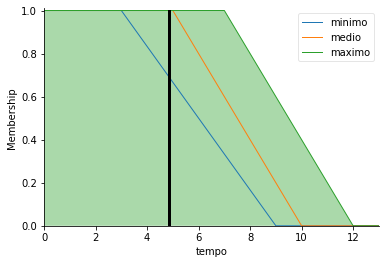

In [37]:
if __name__=="__main__":

  #variáveis de entrada:
  rpm = ctrl.Antecedent(np.arange(0, 12, 1), 'rpm')
  potencia = ctrl.Antecedent(np.arange(0, 151, 1), 'potencia')

  #variável de saída:
  tempo = ctrl.Consequent(np.arange(0, 14, 1), 'tempo')

  #fuzzificação:
  rpm['baixo'] = fuzz.trimf((rpm.universe), [1, 2, 3])
  rpm['medio'] = fuzz.trimf((rpm.universe), [3, 4, 5])
  rpm['maximo'] = fuzz.trimf((rpm.universe),[6, 7, 8])

  potencia['motor_1.6'] = fuzz.trapmf(potencia.universe, [0, 0, 50, 100])
  potencia['motor_1.8'] = fuzz.trimf(potencia.universe, [50, 85, 120])
  potencia['motor_2.0'] = fuzz.trapmf(potencia.universe, [80, 120, 150, 150])

  tempo['minimo'] = fuzz.trapmf(tempo.universe,[0, 0, 3, 9])
  tempo['medio'] = fuzz.trapmf(tempo.universe, [0, 0, 5, 10])
  tempo['maximo'] = fuzz.trapmf(tempo.universe, [0, 0, 7, 12]) 

  #definindo as regras
  regra1 = ctrl.Rule(potencia['motor_1.6'] | rpm['baixo'], tempo['maximo'])
  regra2 = ctrl.Rule(potencia['motor_1.8'] | rpm['medio'], tempo['medio'])
  regra3 = ctrl.Rule(potencia['motor_2.0'] | rpm['maximo'], tempo['minimo'])

  

  #ativação de regras
  controle_do_sistema = ctrl.ControlSystem([regra1, regra2, regra3])
  simulador_automobilistico = ctrl.ControlSystemSimulation(controle_do_sistema)
  
  #mostrando os valores
  simulador_automobilistico.input['rpm'] =8
  simulador_automobilistico.input['potencia'] =50

  simulador_automobilistico.compute()
  print(simulador_automobilistico.output['tempo'])

  tempo.view(sim=simulador_automobilistico)